In [6]:
from sklearn.model_selection import train_test_split
from os import listdir, getcwd
from os.path import join
import matplotlib.pyplot as plt
import numpy as np
from lib import unet
from lib import generator

In [7]:
DATA_DIR = join(getcwd(), 'data')
TRAIN_DIR = join(DATA_DIR, 'train')
MASK_DIR = join(DATA_DIR, 'train_masks')
TRAIN_IMAGE_LIST = listdir(TRAIN_DIR)
MASK_IMAGE_LIST = listdir(MASK_DIR)

In [8]:
train_images, test_images, train_masks, test_masks = train_test_split(TRAIN_IMAGE_LIST, 
                                                                      MASK_IMAGE_LIST, 
                                                                      test_size=0.10000)
train_images, validation_images, train_masks, validation_masks = train_test_split(train_images,
                                                                                  train_masks,
                                                                                  test_size=0.11111)

In [9]:
train_generator = generator.image_generator(TRAIN_DIR, 
                                            MASK_DIR, 
                                            train_images, 
                                            train_masks, 
                                            batch_size = 10, 
                                            img_width = 320, 
                                            num_colors = 8)

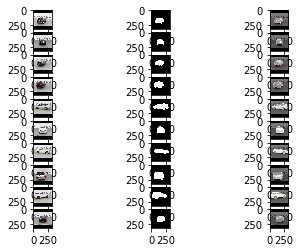

In [10]:
img, mask = next(train_generator)
plot = 1
for i in range(img.shape[0]):
    plt.subplot(img.shape[0], 3, plot)
    plt.imshow(img[i])
    plot += 1
    plt.subplot(img.shape[0], 3, plot)
    plt.imshow(mask[i])
    plot += 1
    plt.subplot(img.shape[0], 3, plot)
    plt.imshow(img[i])
    plt.imshow(mask[i], alpha=0.5)
    plot += 1
plt.show()